Include useful packages:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The data points can be stored in numpy arrays

In [2]:
xvalues_1V = np.array([50.0,60.0,70.0,72.0,74.0,76.0,78.0,80.0,90.0,100.0])
yvalues_1V = np.array([7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000])
yerrors_1V = np.array(yvalues_1V.size*[100])

ax = np.arange(50,100,0.1) # extra x axis from 50 to 100 in small steps for drawing later
# print(ax)

Create a plot with the data defined above

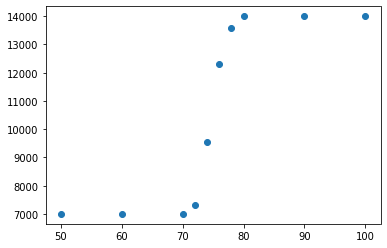

In [3]:
# plt.rcParams["figure.figsize"] = (8,8)
plt.plot(xvalues_1V,yvalues_1V,"o")
plt.show()

Lets define a function do parametrise the data

In [4]:
def fermi(x,A,B,C):
    """A function with the shape of a fermi-dirac distribution"""
    """Todo: Add proper variable names"""
    y = ( A - ( A/ ( np.exp( (x-B) /C ) +2 ) ) )
    return y

We use the `curve_fit` function from the scipy optimize module to fit our data.

In [5]:
startValues_1V = [14000.,75.,3.]
parameters_1V, covariance_1V = curve_fit(fermi, xvalues_1V, yvalues_1V, startValues_1V)
# parameters, covariance = curve_fit(fermi, xvalues, yvalues, startValues, yerrors, True)

In [6]:
fit_A_1V = parameters_1V[0]
fit_B_1V = parameters_1V[1]
fit_C_1V = parameters_1V[2]
# was:
# fit_A = parameters[0]
# fit_C = parameters[1]
# fit_B = parameters[2]

print("fit_A: ", fit_A_1V)
print("fit_B: ", fit_B_1V)
print("fit_C: ", fit_C_1V)
fit_y_1V = fermi(ax,fit_A_1V,fit_B_1V,fit_C_1V)
# in the diagonal elements of the covariance matrix we can find the uncertainties of the n-th parameter
print("cov:\n", "fit_A: ", covariance_1V[0][0],"\n", "fit_B: ", covariance_1V[1][1],"\n", "fit_C: ", covariance_1V[2][2],"\n")

fit_A:  13960.890273869798
fit_B:  73.93285020108559
fit_C:  1.0692251340333283
cov:
 fit_A:  2918.3876971606414 
 fit_B:  0.005347834950045586 
 fit_C:  0.0025853459067430922 



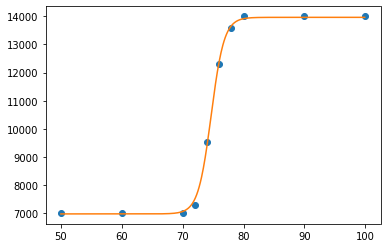

In [7]:
plt.plot(xvalues_1V,yvalues_1V,"o")
# plt.plot(xvalues,fit_y,"-")
plt.plot(ax,fit_y_1V,"-")
plt.show()

We can now redo the exercise above to fo the other voltage settings.

Lets start with defining the x and y axis for our measurements again.

In [8]:
# Start with the 4.5V
# we can not use . in the naming of a variable, so just 4 has to do
xvalues_4V = np.array([55.0,65.0,75.0,77.0,79.0,81.0,83.0,85.0,95.0,105.0])
yvalues_4V = np.array([7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000])

xvalues_8V = np.array([60.0,70.0,80.0,82.0,84.0,86.0,88.0,90.0,100.0,110.0])
yvalues_8V = np.array([7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000])
# Note: I took the same y values everywhere. in reality this was probably not the case.

ax_long = np.arange(50,110,0.1) # another extra axis. we now draw further than 100 in x direction

We now want to fit the same function ans above with the new values. We will try first with the same start parameters as the 1V case.

In [9]:
parameters_4V, covariance_4V = curve_fit(fermi, xvalues_4V, yvalues_4V, startValues_1V)
fit_y_4V = fermi(ax,parameters_4V[0],parameters_4V[1],parameters_4V[2])

parameters_8V, covariance_8V = curve_fit(fermi, xvalues_8V, yvalues_8V, startValues_1V)
fit_y_8V = fermi(ax,parameters_8V[0],parameters_8V[1],parameters_8V[2])

<ipython-input-4-f263287128f6>:4: RuntimeWarning: overflow encountered in exp
  y = ( A - ( A/ ( np.exp( (x-B) /C ) +2 ) ) )
/Users/misc/alice/sw/osx_x86-64/Python-modules/1.0-local2/share/python-modules/lib/python/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


You can see that the fit is failing an the covariance matrix of our parameters can not be calculated. We can have a look at the parameters and the covariance to check

In [10]:
print("parameters:\n", parameters_8V)
print("covariance:\n", covariance_8V)

parameters:
 [1.38944000e+04 8.47600150e+01 3.39395651e-03]
covariance:
 [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


So we set the values to something that might be reasonable and then do the fit again.

In [13]:
startValues_8V = [14000.,84.,3.]
parameters_8V, covariance_8V = curve_fit(fermi, xvalues_8V, yvalues_8V, startValues_8V)
fit_y_8V = fermi(ax,parameters_8V[0],parameters_8V[1],parameters_8V[2])

And we can have a look again and check how it looks

In [14]:
print("parameters:\n", parameters_8V)
print("covariance:\n", covariance_8V)

parameters:
 [1.39608905e+04 8.39328527e+01 1.06922323e+00]
covariance:
 [[ 2.91840388e+03  1.65050338e+00  5.40232655e-01]
 [ 1.65050338e+00  5.34794542e-03 -1.35117438e-03]
 [ 5.40232655e-01 -1.35117438e-03  2.58539990e-03]]


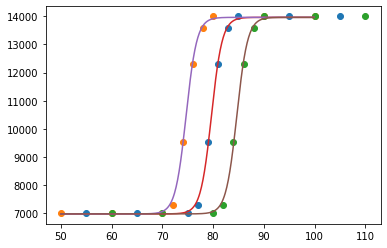

In [15]:
plt.plot(xvalues_4V,yvalues_4V,"o")
plt.plot(xvalues_1V,yvalues_1V,"o")
plt.plot(xvalues_8V,yvalues_8V,"o")
# plt.plot(xvalues,fit_y,"-")
plt.plot(ax,fit_y_4V,"-")
plt.plot(ax,fit_y_1V,"-")
plt.plot(ax,fit_y_8V,"-")
plt.show()

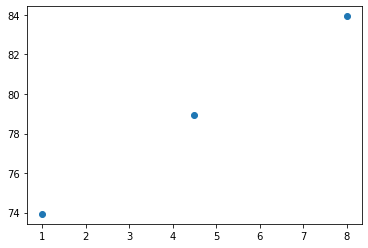

In [16]:
dead_time = [parameters_1V[1],parameters_4V[1],parameters_8V[1]]
ax_voltage = [1,4.5,8]
plt.plot(ax_voltage,dead_time,"o")
plt.show()

In [17]:
def linear(x,A,B):
    y = A* x + B
    return y

In [18]:
parameters_dead, covariance_dead = curve_fit(linear, ax_voltage, dead_time)

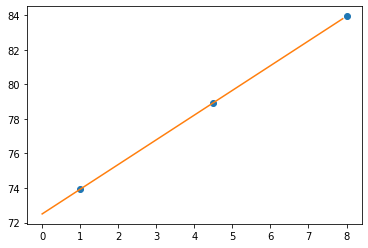

In [19]:
ax_dead = np.arange(0.,8.,0.1)
ay_dead_fit = linear(ax_dead,parameters_dead[0],parameters_dead[1])
plt.plot(ax_voltage,dead_time,"o")
plt.plot(ax_dead,ay_dead_fit,"-")
plt.show()

ok. finally we need to calculate the intersection with the y axis.

In [20]:
intersect = linear(0,parameters_dead[0],parameters_dead[1])
print("Intersection of y with 0: ", intersect)

Intersection of y with 0:  72.5042781785658
